# Atmospheric electric field from INESC TEC station (Porto) #

In [20]:
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))  
options(repr.plot.width=8, repr.plot.height=4)
sink()

library(dplyr)
library(xts)
library(lubridate)
library(RCurl)

# Data pre-processing #

In [21]:
myfile <- getURL('https://rdm.inesctec.pt/dataset/ab12761a-8169-4622-ba73-c8ddc9eaddb7/resource/d934ee1e-3520-44f8-a00e-d519b347397b/download/efieldinesc201802.txt',ssl.verifyhost=FALSE, ssl.verifypeer=FALSE)
dat=read.table(textConnection(myfile),header=FALSE,sep=" ",stringsAsFactors=FALSE)

In [22]:

# data date/time as POSIXct
dat.times=as.POSIXct(paste(dat$V1,dat$V2),format="%Y-%m-%d %H:%M:%S",tz="UTC")

start.time=dat.times[1]
end.time=dat.times[length(dat.times)]

print(paste("data from", start.time, "to", end.time))

V=dat$V3

# check for continuity of record [0 --> continuous record]; result=number of gaps
# 1-minute measurements --> 60 sec
ngaps=length(which(c(1,round(diff(unclass(dat.times)/60)))!=1))
gaps=which(c(1,round(diff(unclass(dat.times)/60)))!=1)

print(paste("number of gaps in data", ngaps))


[1] "data from 2018-02-21 to 2018-02-26 23:59:00"
[1] "number of gaps in data 0"


In [23]:
#fill-in gaps by adding missing times as NA values 

all.times <- seq.POSIXt(from=start.time, to=end.time, by=60)
df <- data.frame(dat.times=all.times,stringsAsFactors=FALSE)
data.all.times <- full_join(df,data.frame(dat.times=dat.times, V=V))

Efield.xts=xts(data.all.times$V,data.all.times$dat.times)

Joining, by = "dat.times"


# Data visualisation #

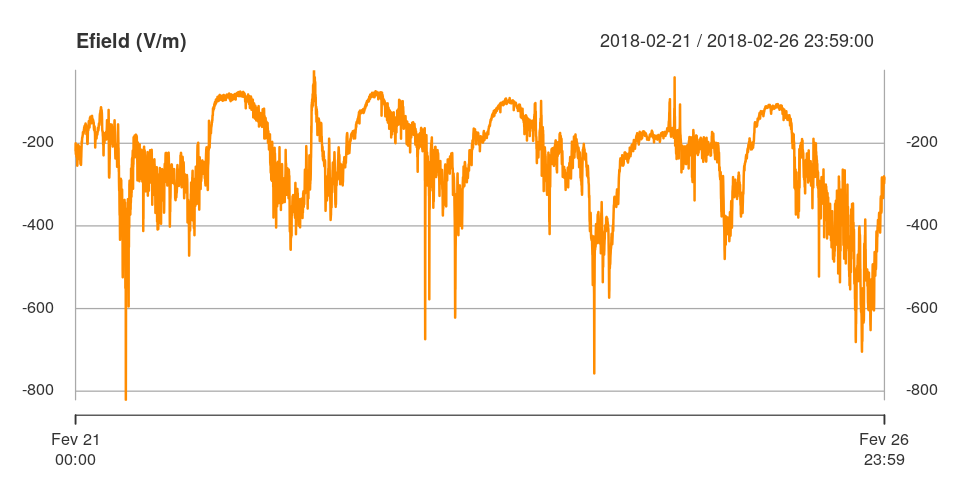

In [25]:
plot(Efield.xts, main="Efield (V/m)",col="darkorange", major.ticks="days")
